## Support Vector Machines

# 
* A SVM is a supervised ML classification algorithm.
* The objective of the SVM algorithm is to find a hyperplane in a N-dimensional space (N - no.of features) which separtes data into classes.
* According to the SVM algorithm we find the points closest to the line(hyper plane) from both the classes.These points are called "support vectors".
* we compute the distance between the line and the support vectors. This distance is called the "margin". 
* Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.


* https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
* https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
* https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

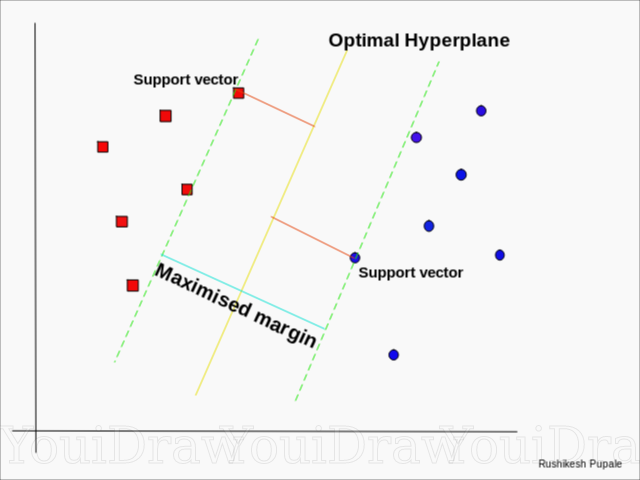

### Separation planes
* Linear
* Non-Linear

#### Dealing with non-linear and inseparable planes

* SVM uses a kernel trick to transform the low dimensional input space to a higher dimensional space
* In otherwords v can say that it converts non separable problem to separable problem by adding more dimension to it.
* Kernals helps in building a more accurate classifier.
* Kernal is a method of using a linear classifier to solve a non-linear problem
 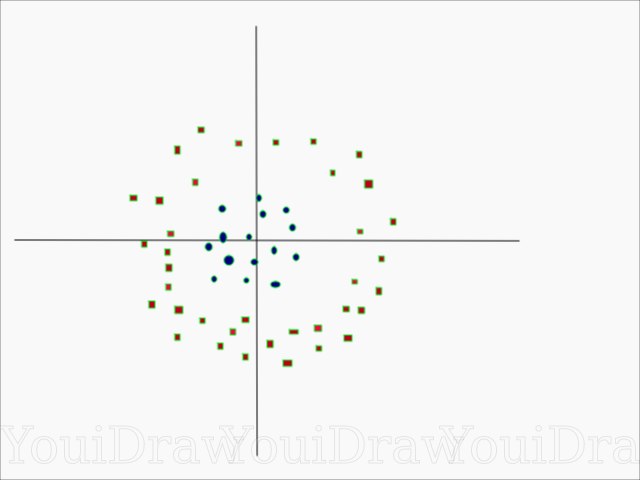

#### SVM Kernals
* Linear 
* Polynomial
* Radial Basis Function (RBF)(Gaussian)

In [4]:
# A linear kernel can be used as a normal dot product of any two given observations.
# The product between two vectors is the sum of the multiplication of each pair of input plots( summation(aibi) = a1b1+...+anbn)

In [6]:
# A polynomial kernel is a more generalised form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear
# input space.

In [7]:
# A RBF kernel is a popular kernel function commonly used in svm classification. RBF can map an input space in infinite
# dimensional space.

#### Let's build model in sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Here we're using standardscaler to convert our dataset features into same dimensions or magnitudes
# It is importent in ML algorithms which works on a distance basis. Since SVM works on a distance basis(while calculating 
# hyperplane it calculates nearest distance between the support vectors)

In [7]:
cancer = datasets.load_breast_cancer()
cancer
#cancer.keys()

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [24]:
cancer.target_names
# this is a binary classifier 

array(['malignant', 'benign'], dtype='<U9')

In [25]:
# Lets see input feature space
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
cancer.feature_names.shape

(30,)

In [27]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [28]:
X = cancer.data
y = cancer.target

In [29]:
X.shape, y.shape

((569, 30), (569,))

In [30]:
X[0:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [31]:
# 0 : malignant, 1 : benign
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Standardization

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Split the data and build the model

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1,stratify = y)

#here "stratify" would make sure that labels would b equally divided.

In [34]:
from sklearn import svm

Accuracy : 0.9912280701754386
Precision : 0.9863013698630136
Recal : 1.0
Confusion Matrix


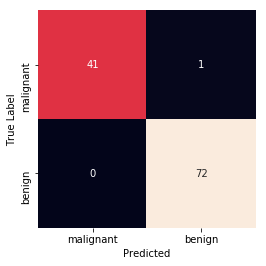

In [42]:
# Creating svm classifier using linear kernel

clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

print('Accuracy :',metrics.accuracy_score(y_test, y_predict))

print('Precision :',metrics.precision_score(y_test, y_predict))
print('Recal :',metrics.recall_score(y_test,y_predict))

print('Confusion Matrix')

# Here Recal is exactly 1.0 i.e 100% recal
# How would u understand the Recal is perfect ? For that we need to draw Confusion Matrix

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd',cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# square = True means it'll draw a square plot
# fmt = d means formate = decimal

# From confusion matrix we could see that if cancer = benign then it predicted 72 which is 100% exactly as benign
# and it also predicts that  41 patients r malignent and 1 patient is benign


In [43]:
# How do u know that one malignent being predicted as benign ?
# v can get this by getting the total no.of labels in the y_test

element,count = np.unique(y_test, return_counts=True)
element,count

(array([0, 1]), array([42, 72], dtype=int64))

In [18]:
# Checking accuarcy of SVM without scaling or standerdization

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1,stratify = y)

clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

print('Accuracy :',metrics.accuracy_score(y_test, y_predict))

Accuracy : 0.9649122807017544


#### Polynomial Kernel

Accuracy : 0.9912280701754386
Precision : 1.0
Recal : 0.9861111111111112
Confusion Matrix


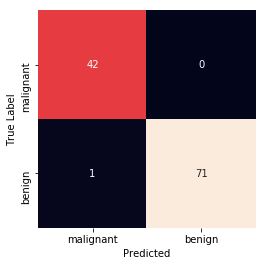

In [44]:
# press shift+tab in svm.SVC() to check documentation

clf = svm.SVC(kernel='poly',degree=1, gamma = 100)              
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

# here 'degree' comes only if kernel is 'polynomial'
# here 'gamma' comes if kernel is 'polynomial','rbd','sigmoid'
# a polynomial with degree = 1  is equivalent to a linear straight line i.e linear kernel

# As degree value changes(i.e, degree = 2,3,4,5) we could see that accuarcy decreases as well, this is b'cause here we have just
# two labels(malignent,benign), so in a two label we don't need a very complex models.
# Otherwise when v take complex models overfitting occurs which is known as " curse of dimensionality "
# Since this example is really very simple a straight line or a straight hyperplane can classify malignents and benigns so v do
# not need to apply polynomail and any other type of kernels.
 
print('Accuracy :',metrics.accuracy_score(y_test, y_predict))

print('Precision :',metrics.precision_score(y_test, y_predict))
print('Recal :',metrics.recall_score(y_test,y_predict))

print('Confusion Matrix')

# Here Recal is exactly 1.0 i.e 100% recal  
# How would u understand the Recal is perfect ? For that we need to draw Confusion Matrix

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd',cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

#### Sigmoid Kernel

Accuracy : 0.8859649122807017
Precision : 0.927536231884058
Recal : 0.8888888888888888
Confusion Matrix


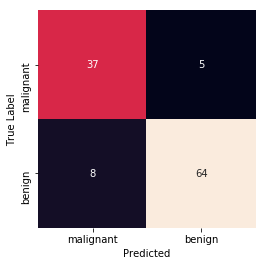

In [47]:
clf = svm.SVC(kernel='sigmoid', gamma = 100, C = 1) # C :  for Penalty parameter C of the error term
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

print('Accuracy :',metrics.accuracy_score(y_test, y_predict))

print('Precision :',metrics.precision_score(y_test, y_predict))
print('Recal :',metrics.recall_score(y_test,y_predict))

print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd',cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [ ]:
# workout RBF as well for the dataset

# For this breast_cancer dataset Linear kernel gives the best accuracy when compared with polynomail and sigmoid kernels 

# There is no predefined kernel for all the datatypes or data, we need to understand our data and  then need ro test with 
# different kernels of SVM 